In [4]:
import gtts
import os
from playsound import playsound
tts = gtts.gTTS("The LORD reigns")
tts.save("hello.mp3")
playsound("hello.mp3")
os.remove("hello.mp3")

In [5]:
import time
import speech_recognition as sr
from time import ctime
from gtts import gTTS
import gtts
import os
from playsound import playsound

def speak(data):
    tts = gTTS(data)
    tts.save("hello.mp3")
    playsound("hello.mp3")
    os.remove("hello.mp3")

def recordAudio():
    # Record Audio
    r = sr.Recognizer()
    with sr.Microphone() as source:
        audio = r.listen(source)
        
    data = ""
    try:
        data = r.recognize_google(audio)
    except sr.UnknownValueError:
        #print("Google Speech Recognition could not understand audio")
        return 1
    except sr.RequestError as e:
        #print("Could not request results from Google Speech Recognition service; {0}".format(e))
        return 2
    return data

In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, make_scorer
from time import time

from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.externals import joblib


In [7]:
df = pd.read_excel('Answers1.xlsx')
df = df.dropna()
df["effective_intelligence"].astype('int')
df = df.reset_index()
df

,index,Age,Gender,Answer,effective_intelligence,planning_organising,speed_decision,liveliness,adaptability
0,0,21,f,I attended St.Joseph uptil my first grade and ...,1,1,0,0,0
1,1,22,m,I dont know,0,0,0,0,0
2,2,24,m,I dont care,0,0,0,0,0
3,3,30,f,Nothing much,0,0,0,0,0
4,4,27,m,I hated it,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
89,89,25,f,I did my schooling in Velammal matriculation h...,1,1,0,0,0
90,90,21,f,I completed my tenth abd twelth in Devi Academ...,1,0,0,0,0
91,91,25,f,I completed my schooling in Doon School.i lear...,0,1,0,0,0
92,92,25,f,I completed my schooling in Doon School.i lear...,0,1,0,0,0


In [8]:
import nltk
from nltk.stem import WordNetLemmatizer  
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer() 
df['Lem'] = np.nan
for i in range(0,len(df)):
    df['Lem'].iloc[i] = lemmatizer.lemmatize(df['Answer'].iloc[i])
df

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Jonnah\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\Jonnah\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,index,Age,Gender,Answer,effective_intelligence,planning_organising,speed_decision,liveliness,adaptability,Lem
0,0,21,f,I attended St.Joseph uptil my first grade and ...,1,1,0,0,0,I attended St.Joseph uptil my first grade and ...
1,1,22,m,I dont know,0,0,0,0,0,I dont know
2,2,24,m,I dont care,0,0,0,0,0,I dont care
3,3,30,f,Nothing much,0,0,0,0,0,Nothing much
4,4,27,m,I hated it,0,0,0,0,0,I hated it
...,...,...,...,...,...,...,...,...,...,...
89,89,25,f,I did my schooling in Velammal matriculation h...,1,1,0,0,0,I did my schooling in Velammal matriculation h...
90,90,21,f,I completed my tenth abd twelth in Devi Academ...,1,0,0,0,0,I completed my tenth abd twelth in Devi Academ...
91,91,25,f,I completed my schooling in Doon School.i lear...,0,1,0,0,0,I completed my schooling in Doon School.i lear...
92,92,25,f,I completed my schooling in Doon School.i lear...,0,1,0,0,0,I completed my schooling in Doon School.i lear...


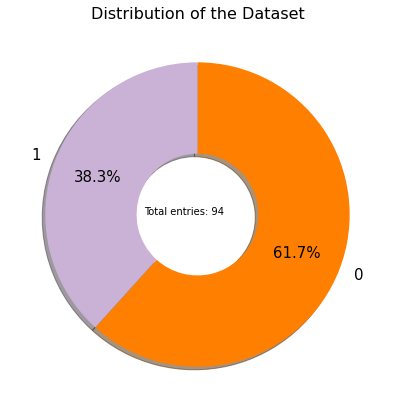

In [12]:
plt.figure(figsize = (7,7))
sorted_counts = df['effective_intelligence'].value_counts()
#sorted_counts = df['planning_organising'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, wedgeprops = {'width' : 0.6},
       autopct='%1.1f%%', pctdistance = 0.7, textprops = {'color': 'black', 'fontsize' : 15}, shadow = True,
        colors = sns.color_palette("Paired")[7:])
plt.text(x = -0.35, y = 0, s = 'Total entries: {}'.format(df.shape[0]))
plt.title('Distribution of the Dataset', fontsize = 16);

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df['Answer'], df['effective_intelligence'], random_state=0)
print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 94
Number of rows in the training set: 70
Number of rows in the test set: 24


In [14]:
scores = pd.DataFrame(columns=["Model", "Accuracy_score","time"])

In [15]:
import datetime
vect = CountVectorizer(ngram_range=(1,5)).fit(X_train)

X_train_vectorized = vect.transform(X_train)

start = datetime.datetime.now()
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)

C:\Users\Jonnah\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)

In [17]:
start = datetime.datetime.now()
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)
scores

,Model,Accuracy_score,time
0,LogisticRegression(),0.875,0 days 00:00:00.165492
1,MultinomialNB(),0.750,0 days 00:00:00.011062


In [18]:
start = datetime.datetime.now()
model = DecisionTreeClassifier()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)
scores

,Model,Accuracy_score,time
0,LogisticRegression(),0.875000,0 days 00:00:00.165492
1,MultinomialNB(),0.750000,0 days 00:00:00.011062
2,DecisionTreeClassifier(),0.791667,0 days 00:00:00.014980


In [19]:
start = datetime.datetime.now()
model = LinearSVC()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)
scores

C:\Users\Jonnah\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


,Model,Accuracy_score,time
0,LogisticRegression(),0.875000,0 days 00:00:00.165492
1,MultinomialNB(),0.750000,0 days 00:00:00.011062
2,DecisionTreeClassifier(),0.791667,0 days 00:00:00.014980
3,LinearSVC(),0.750000,0 days 00:00:00.042915


In [20]:
start = datetime.datetime.now()
model = AdaBoostClassifier()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)
scores

,Model,Accuracy_score,time
0,LogisticRegression(),0.875000,0 days 00:00:00.165492
1,MultinomialNB(),0.750000,0 days 00:00:00.011062
2,DecisionTreeClassifier(),0.791667,0 days 00:00:00.014980
3,LinearSVC(),0.750000,0 days 00:00:00.042915
4,AdaBoostClassifier(),0.833333,0 days 00:00:00.134674


In [21]:
start = datetime.datetime.now()
model = RandomForestClassifier()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)
scores

,Model,Accuracy_score,time
0,LogisticRegression(),0.875000,0 days 00:00:00.165492
1,MultinomialNB(),0.750000,0 days 00:00:00.011062
2,DecisionTreeClassifier(),0.791667,0 days 00:00:00.014980
3,LinearSVC(),0.750000,0 days 00:00:00.042915
4,AdaBoostClassifier(),0.833333,0 days 00:00:00.134674
5,RandomForestClassifier(),0.750000,0 days 00:00:00.150636


In [22]:
start = datetime.datetime.now()
model = BaggingClassifier()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)
scores

,Model,Accuracy_score,time
0,LogisticRegression(),0.875000,0 days 00:00:00.165492
1,MultinomialNB(),0.750000,0 days 00:00:00.011062
2,DecisionTreeClassifier(),0.791667,0 days 00:00:00.014980
3,LinearSVC(),0.750000,0 days 00:00:00.042915
4,AdaBoostClassifier(),0.833333,0 days 00:00:00.134674
5,RandomForestClassifier(),0.750000,0 days 00:00:00.150636
6,BaggingClassifier(),0.791667,0 days 00:00:00.080802


In [23]:
start = datetime.datetime.now()
model = SGDClassifier()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)
scores

,Model,Accuracy_score,time
0,LogisticRegression(),0.875000,0 days 00:00:00.165492
1,MultinomialNB(),0.750000,0 days 00:00:00.011062
2,DecisionTreeClassifier(),0.791667,0 days 00:00:00.014980
3,LinearSVC(),0.750000,0 days 00:00:00.042915
4,AdaBoostClassifier(),0.833333,0 days 00:00:00.134674
5,RandomForestClassifier(),0.750000,0 days 00:00:00.150636
6,BaggingClassifier(),0.791667,0 days 00:00:00.080802
7,SGDClassifier(),0.708333,0 days 00:00:00.003989


In [24]:
start = datetime.datetime.now()
model = KNeighborsClassifier()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)
scores

,Model,Accuracy_score,time
0,LogisticRegression(),0.875000,0 days 00:00:00.165492
1,MultinomialNB(),0.750000,0 days 00:00:00.011062
2,DecisionTreeClassifier(),0.791667,0 days 00:00:00.014980
3,LinearSVC(),0.750000,0 days 00:00:00.042915
4,AdaBoostClassifier(),0.833333,0 days 00:00:00.134674
5,RandomForestClassifier(),0.750000,0 days 00:00:00.150636
6,BaggingClassifier(),0.791667,0 days 00:00:00.080802
7,SGDClassifier(),0.708333,0 days 00:00:00.003989
8,KNeighborsClassifier(),0.625000,0 days 00:00:00.000978


In [25]:
models = [MultinomialNB(), DecisionTreeClassifier(), LinearSVC(), AdaBoostClassifier(), 
          RandomForestClassifier(), BaggingClassifier(),
         LogisticRegression(), SGDClassifier(), KNeighborsClassifier()]

In [26]:
vect = CountVectorizer(ngram_range=(1,5)).fit(X_train)

X_train_vectorized = vect.transform(X_train)

start = datetime.datetime.now()
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)

C:\Users\Jonnah\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


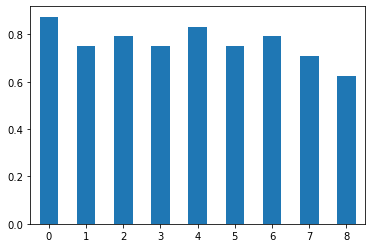

In [27]:
index = ['MultinomialNB()', 'DecisionTreeClassifier()', 'LinearSVC()', 'AdaBoostClassifier()', 
          'RandomForestClassifier()', 'BaggingClassifier()',
         'LogisticRegression()', 'SGDClassifier()', 'KNeighborsClassifier()']
ax = scores["Accuracy_score"].plot.bar(rot=0)

In [28]:
s = ["I did my schooling in maharishi vidhya mandhir. I learnt maths and social in tenth.I also learnt computerscience in twelth. My fovorite is science because it is more practical. Im currently doing my bachelors in computer science engineering in Madha inastiture of tech. I took it up because i Like technology. My parents paid my tuition throughoit. I want to become like Mayisamy Annadhurai, his story inspires me. I like to eat and sleep."]
k = vect.transform(s)
model.predict(k)

array([0], dtype=int64)

In [29]:
print(y_test)
print(predictions)

2     0
30    1
56    1
16    0
13    0
61    0
62    0
79    0
33    1
78    1
76    0
7     0
51    0
89    1
93    1
60    1
8     0
22    1
73    0
45    0
26    0
43    1
24    0
6     0
Name: effective_intelligence, dtype: int64
[0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0]


C:\Users\Jonnah\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jonnah\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


,Model,Accuracy_score,time
0,LogisticRegression(),0.875000,0 days 00:00:00.071782
1,MultinomialNB(),0.750000,0 days 00:00:00
2,DecisionTreeClassifier(),0.750000,0 days 00:00:00.005984
3,LinearSVC(),0.833333,0 days 00:00:00.019946
4,AdaBoostClassifier(),0.833333,0 days 00:00:00.087766
5,RandomForestClassifier(),0.750000,0 days 00:00:00.119705
6,BaggingClassifier(),0.791667,0 days 00:00:00.043883
7,SGDClassifier(),0.625000,0 days 00:00:00.000970
8,KNeighborsClassifier(),0.708333,0 days 00:00:00


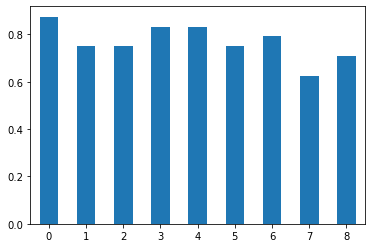

In [46]:
scores = pd.DataFrame(columns=["Model", "Accuracy_score","time"])
import datetime
vect = CountVectorizer(ngram_range=(1,3)).fit(X_train)

X_train_vectorized = vect.transform(X_train)

start = datetime.datetime.now()
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)

dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)

start = datetime.datetime.now()
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)

start = datetime.datetime.now()
model = DecisionTreeClassifier()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)

start = datetime.datetime.now()
model = LinearSVC()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)

start = datetime.datetime.now()
model = AdaBoostClassifier()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)

start = datetime.datetime.now()
model = RandomForestClassifier()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)

start = datetime.datetime.now()
model = BaggingClassifier()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)

start = datetime.datetime.now()
model = SGDClassifier()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)

start = datetime.datetime.now()
model = KNeighborsClassifier()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)
ax = scores["Accuracy_score"].plot.bar(rot=0)
scores

C:\Users\Jonnah\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jonnah\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


,Model,Accuracy_score,time
0,LogisticRegression(),0.875000,0 days 00:00:00.079785
1,MultinomialNB(),0.750000,0 days 00:00:00.000997
2,DecisionTreeClassifier(),0.750000,0 days 00:00:00.007978
3,LinearSVC(),0.833333,0 days 00:00:00.026928
4,AdaBoostClassifier(),0.750000,0 days 00:00:00.110704
5,RandomForestClassifier(),0.750000,0 days 00:00:00.138663
6,BaggingClassifier(),0.833333,0 days 00:00:00.058843
7,SGDClassifier(),0.708333,0 days 00:00:00.000998
8,KNeighborsClassifier(),0.625000,0 days 00:00:00.000997


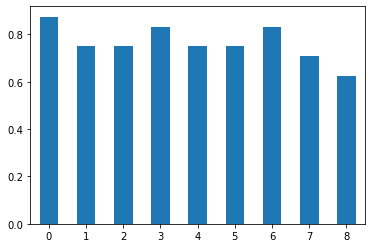

In [47]:
scores = pd.DataFrame(columns=["Model", "Accuracy_score","time"])
import datetime
vect = CountVectorizer(ngram_range=(1,4)).fit(X_train)

X_train_vectorized = vect.transform(X_train)

start = datetime.datetime.now()
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)

dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)

start = datetime.datetime.now()
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)

start = datetime.datetime.now()
model = DecisionTreeClassifier()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)

start = datetime.datetime.now()
model = LinearSVC()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)

start = datetime.datetime.now()
model = AdaBoostClassifier()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)

start = datetime.datetime.now()
model = RandomForestClassifier()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)

start = datetime.datetime.now()
model = BaggingClassifier()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)

start = datetime.datetime.now()
model = SGDClassifier()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)

start = datetime.datetime.now()
model = KNeighborsClassifier()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)
ax = scores["Accuracy_score"].plot.bar(rot=0)
scores

C:\Users\Jonnah\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jonnah\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


,Model,Accuracy_score,time
0,LogisticRegression(),0.875000,0 days 00:00:00.091712
1,MultinomialNB(),0.750000,0 days 00:00:00.000997
2,DecisionTreeClassifier(),0.750000,0 days 00:00:00.011968
3,LinearSVC(),0.708333,0 days 00:00:00.034906
4,AdaBoostClassifier(),0.750000,0 days 00:00:00.122672
5,RandomForestClassifier(),0.750000,0 days 00:00:00.138661
6,BaggingClassifier(),0.833333,0 days 00:00:00.073808
7,SGDClassifier(),0.666667,0 days 00:00:00.001958
8,KNeighborsClassifier(),0.625000,0 days 00:00:00


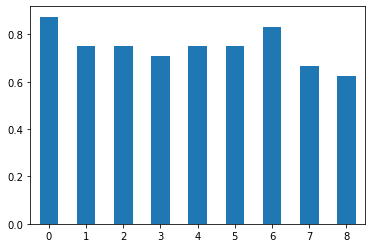

In [48]:
scores = pd.DataFrame(columns=["Model", "Accuracy_score","time"])
import datetime
vect = CountVectorizer(ngram_range=(1,5)).fit(X_train)

X_train_vectorized = vect.transform(X_train)

start = datetime.datetime.now()
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)

dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)

start = datetime.datetime.now()
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)

start = datetime.datetime.now()
model = DecisionTreeClassifier()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)

start = datetime.datetime.now()
model = LinearSVC()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)

start = datetime.datetime.now()
model = AdaBoostClassifier()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)

start = datetime.datetime.now()
model = RandomForestClassifier()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)

start = datetime.datetime.now()
model = BaggingClassifier()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)

start = datetime.datetime.now()
model = SGDClassifier()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)

start = datetime.datetime.now()
model = KNeighborsClassifier()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)
ax = scores["Accuracy_score"].plot.bar(rot=0)
scores

C:\Users\Jonnah\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jonnah\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


,Model,Accuracy_score,time
0,LogisticRegression(),0.833333,0 days 00:00:00.104719
1,MultinomialNB(),0.750000,0 days 00:00:00.000998
2,DecisionTreeClassifier(),0.708333,0 days 00:00:00.013936
3,LinearSVC(),0.750000,0 days 00:00:00.040890
4,AdaBoostClassifier(),0.833333,0 days 00:00:00.154619
5,RandomForestClassifier(),0.750000,0 days 00:00:00.152571
6,BaggingClassifier(),0.875000,0 days 00:00:00.086769
7,SGDClassifier(),0.583333,0 days 00:00:00.001968
8,KNeighborsClassifier(),0.625000,0 days 00:00:00


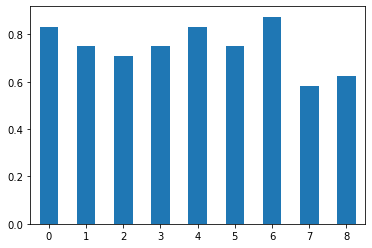

In [49]:
scores = pd.DataFrame(columns=["Model", "Accuracy_score","time"])
import datetime
vect = CountVectorizer(ngram_range=(1,6)).fit(X_train)

X_train_vectorized = vect.transform(X_train)

start = datetime.datetime.now()
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)

dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)

start = datetime.datetime.now()
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)

start = datetime.datetime.now()
model = DecisionTreeClassifier()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)

start = datetime.datetime.now()
model = LinearSVC()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)

start = datetime.datetime.now()
model = AdaBoostClassifier()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)

start = datetime.datetime.now()
model = RandomForestClassifier()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)

start = datetime.datetime.now()
model = BaggingClassifier()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)

start = datetime.datetime.now()
model = SGDClassifier()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)

start = datetime.datetime.now()
model = KNeighborsClassifier()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)
ax = scores["Accuracy_score"].plot.bar(rot=0)
scores

C:\Users\Jonnah\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jonnah\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


,Model,Accuracy_score,time
0,LogisticRegression(),0.833333,0 days 00:00:00.120676
1,MultinomialNB(),0.708333,0 days 00:00:00.001995
2,DecisionTreeClassifier(),0.791667,0 days 00:00:00.014960
3,LinearSVC(),0.750000,0 days 00:00:00.049373
4,AdaBoostClassifier(),0.833333,0 days 00:00:00.163595
5,RandomForestClassifier(),0.750000,0 days 00:00:00.179524
6,BaggingClassifier(),0.708333,0 days 00:00:00.096742
7,SGDClassifier(),0.625000,0 days 00:00:00.000964
8,KNeighborsClassifier(),0.625000,0 days 00:00:00.000997


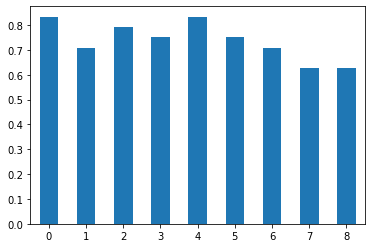

In [50]:
scores = pd.DataFrame(columns=["Model", "Accuracy_score","time"])
import datetime
vect = CountVectorizer(ngram_range=(1,7)).fit(X_train)

X_train_vectorized = vect.transform(X_train)

start = datetime.datetime.now()
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)

dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)

start = datetime.datetime.now()
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)

start = datetime.datetime.now()
model = DecisionTreeClassifier()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)

start = datetime.datetime.now()
model = LinearSVC()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)

start = datetime.datetime.now()
model = AdaBoostClassifier()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)

start = datetime.datetime.now()
model = RandomForestClassifier()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)

start = datetime.datetime.now()
model = BaggingClassifier()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)

start = datetime.datetime.now()
model = SGDClassifier()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)

start = datetime.datetime.now()
model = KNeighborsClassifier()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)
ax = scores["Accuracy_score"].plot.bar(rot=0)
scores

C:\Users\Jonnah\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jonnah\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


,Model,Accuracy_score,time
0,LogisticRegression(),0.833333,0 days 00:00:00.138598
1,MultinomialNB(),0.708333,0 days 00:00:00.000998
2,DecisionTreeClassifier(),0.750000,0 days 00:00:00.018949
3,LinearSVC(),0.708333,0 days 00:00:00.054854
4,AdaBoostClassifier(),0.750000,0 days 00:00:00.182537
5,RandomForestClassifier(),0.750000,0 days 00:00:00.187499
6,BaggingClassifier(),0.791667,0 days 00:00:00.120678
7,SGDClassifier(),0.750000,0 days 00:00:00.001967
8,KNeighborsClassifier(),0.625000,0 days 00:00:00


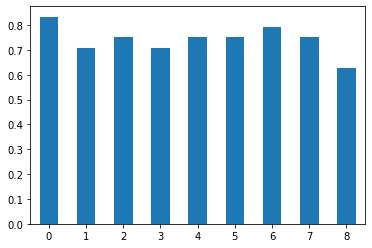

In [51]:
scores = pd.DataFrame(columns=["Model", "Accuracy_score","time"])
import datetime
vect = CountVectorizer(ngram_range=(1,8)).fit(X_train)

X_train_vectorized = vect.transform(X_train)

start = datetime.datetime.now()
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)

dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)

start = datetime.datetime.now()
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)

start = datetime.datetime.now()
model = DecisionTreeClassifier()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)

start = datetime.datetime.now()
model = LinearSVC()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)

start = datetime.datetime.now()
model = AdaBoostClassifier()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)

start = datetime.datetime.now()
model = RandomForestClassifier()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)

start = datetime.datetime.now()
model = BaggingClassifier()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)

start = datetime.datetime.now()
model = SGDClassifier()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)

start = datetime.datetime.now()
model = KNeighborsClassifier()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)
ax = scores["Accuracy_score"].plot.bar(rot=0)
scores

C:\Users\Jonnah\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jonnah\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


,Model,Accuracy_score,time
0,LogisticRegression(),0.833333,0 days 00:00:00.161546
1,MultinomialNB(),0.708333,0 days 00:00:00.000998
2,DecisionTreeClassifier(),0.750000,0 days 00:00:00.023936
3,LinearSVC(),0.750000,0 days 00:00:00.062832
4,AdaBoostClassifier(),0.833333,0 days 00:00:00.194514
5,RandomForestClassifier(),0.750000,0 days 00:00:00.198107
6,BaggingClassifier(),0.791667,0 days 00:00:00.143614
7,SGDClassifier(),0.666667,0 days 00:00:00.003957
8,KNeighborsClassifier(),0.625000,0 days 00:00:00.000998


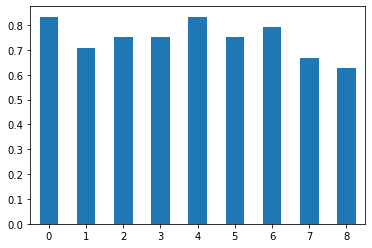

In [53]:
scores = pd.DataFrame(columns=["Model", "Accuracy_score","time"])
import datetime
vect = CountVectorizer(ngram_range=(1,9)).fit(X_train)

X_train_vectorized = vect.transform(X_train)

start = datetime.datetime.now()
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)

dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)

start = datetime.datetime.now()
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)

start = datetime.datetime.now()
model = DecisionTreeClassifier()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)

start = datetime.datetime.now()
model = LinearSVC()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)

start = datetime.datetime.now()
model = AdaBoostClassifier()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)

start = datetime.datetime.now()
model = RandomForestClassifier()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)

start = datetime.datetime.now()
model = BaggingClassifier()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)

start = datetime.datetime.now()
model = SGDClassifier()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)

start = datetime.datetime.now()
model = KNeighborsClassifier()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)
ax = scores["Accuracy_score"].plot.bar(rot=0)
scores

C:\Users\Jonnah\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jonnah\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


,Model,Accuracy_score,time
0,LogisticRegression(),0.833333,0 days 00:00:00.185485
1,MultinomialNB(),0.708333,0 days 00:00:00.001995
2,DecisionTreeClassifier(),0.750000,0 days 00:00:00.027925
3,LinearSVC(),0.750000,0 days 00:00:00.069813
4,AdaBoostClassifier(),0.750000,0 days 00:00:00.213472
5,RandomForestClassifier(),0.750000,0 days 00:00:00.208440
6,BaggingClassifier(),0.875000,0 days 00:00:00.159577
7,SGDClassifier(),0.666667,0 days 00:00:00.001968
8,KNeighborsClassifier(),0.625000,0 days 00:00:00


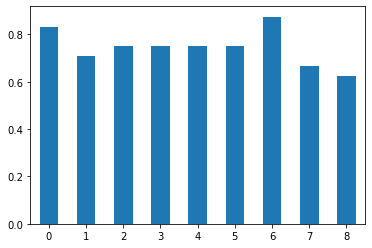

In [54]:
scores = pd.DataFrame(columns=["Model", "Accuracy_score","time"])
import datetime
vect = CountVectorizer(ngram_range=(1,10)).fit(X_train)

X_train_vectorized = vect.transform(X_train)

start = datetime.datetime.now()
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)

dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)

start = datetime.datetime.now()
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)

start = datetime.datetime.now()
model = DecisionTreeClassifier()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)

start = datetime.datetime.now()
model = LinearSVC()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)

start = datetime.datetime.now()
model = AdaBoostClassifier()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)

start = datetime.datetime.now()
model = RandomForestClassifier()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)

start = datetime.datetime.now()
model = BaggingClassifier()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)

start = datetime.datetime.now()
model = SGDClassifier()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)

start = datetime.datetime.now()
model = KNeighborsClassifier()
model.fit(X_train_vectorized, y_train)
end = datetime.datetime.now()

predictions = model.predict(vect.transform(X_test))
time = end - start
score = accuracy_score(y_test, predictions)
dict1 = {"Model":str(model), "Accuracy_score":score,"time":time}
scores = scores.append(dict1, ignore_index=True)
ax = scores["Accuracy_score"].plot.bar(rot=0)
scores